In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

In [43]:
# Load the main dataset
file_path = './data/qualitative_final_v2.csv'
df = pd.read_csv(file_path)

# Drop the first two rows
df = df.iloc[2:].reset_index(drop=True)

In [44]:
# Load the issue skills file
# This file should have columns: 'issue_number', 'skill1', 'skill2', 'skill3', 'skill4'
skills_file = './data/Milestones - issues labels_final.csv'
df_skills = pd.read_csv(skills_file)

In [45]:
# Merge the main dataset with the skills dataset on 'issue_number'
df_merged = pd.merge(df, df_skills, on='issue_number', how='left')

In [46]:
# Rename Q57 for clarity and set the likert_column variable
df_merged.rename(columns={'Q57': 'Q57_answer'}, inplace=True)
likert_column = 'Q57_answer'

In [47]:
# Function to count matching skills between participant's Q57 answer and expected skills (from 4 columns)
def count_matching_skills(row, likert_column, skill_columns):
    q57_answer = row[likert_column]
    if pd.isna(q57_answer):
        return 0
    
    # Replace specified phrases before processing
    q57_answer = q57_answer.replace("Network Development", "Network")
    q57_answer = q57_answer.replace("User Interface (UI)", "User Interface")
    
    # Split the Q57 answer into individual skills and convert to lowercase
    q57_list = [item.strip().lower() for item in q57_answer.split(",")]
    
    # Build a set of expected skills from the four skill columns, ignoring NaN values
    expected_skills = set()
    for col in skill_columns:
        skill = row[col]
        if pd.notna(skill):
            expected_skills.add(skill.strip().lower())
    
    # Count the number of matching skills
    matches = set(q57_list).intersection(expected_skills)
    return len(matches)

# Define the skill columns
skill_columns = ['skill1', 'skill2', 'skill3', 'skill4']

# Compute the matching count for each participant
df_merged['matching_count'] = df_merged.apply(lambda row: count_matching_skills(row, likert_column, skill_columns), axis=1)

# Display a sample of the data
df_merged[['issue_number', 'Q57_answer', 'skill1', 'skill2', 'skill3', 'skill4', 'matching_count']].head()

,issue_number,Q57_answer,skill1,skill2,skill3,skill4,matching_count
0,5679.0,NaN,Input and Output,Test,NaN,NaN,0
1,5485.0,NaN,Input and Output,NaN,NaN,NaN,0
2,4612.0,NaN,User Interface,NaN,NaN,NaN,0
3,5194.0,NaN,Google common,Network,Logging,Input and Output,0
4,4612.0,"User Interface (UI),Testing",User Interface,NaN,NaN,NaN,1


In [48]:
# Extract matching_count values for the two groups
control = df_merged[df_merged['group'] == 'Control']['matching_count'].dropna()
treatment = df_merged[df_merged['group'] == 'Treatment']['matching_count'].dropna()

# Perform the Mann-Whitney U test
u_stat, p_value = mannwhitneyu(control, treatment, alternative='two-sided')
print('Mann-Whitney U Test: U statistic =', u_stat, ', p-value =', p_value)

# Function to compute Cliff's Delta
def cliffs_delta(x, y):
    n1, n2 = len(x), len(y)
    greater = sum(1 for xi in x for yi in y if xi > yi)
    less = sum(1 for xi in x for yi in y if xi < yi)
    delta = (greater - less) / (n1 * n2)
    return delta

# Compute Cliff's Delta
delta_value = cliffs_delta(list(control), list(treatment))
print("Cliff's Delta:", delta_value)

Mann-Whitney U Test: U statistic = 46.5 , p-value = 0.036374161095233365
Cliff's Delta: -0.44970414201183434


In [49]:
pd.set_option('display.max_columns', None)
df_merged[['issue_number', 'Q57_answer', 'skill1', 'skill2', 'skill3', 'skill4', 'matching_count']]

,issue_number,Q57_answer,skill1,skill2,skill3,skill4,matching_count
0,5679.0,NaN,Input and Output,Test,NaN,NaN,0
1,5485.0,NaN,Input and Output,NaN,NaN,NaN,0
2,4612.0,NaN,User Interface,NaN,NaN,NaN,0
3,5194.0,NaN,Google common,Network,Logging,Input and Output,0
4,4612.0,"User Interface (UI),Testing",User Interface,NaN,NaN,NaN,1
5,5069.0,"User Interface (UI),Testing,Network Developmen...",Network,User Interface,Logging,NaN,2
6,5485.0,"Testing,Google Common",Input and Output,NaN,NaN,NaN,0
7,5485.0,"Logging,Testing,Input and Output",Input and Output,NaN,NaN,NaN,1
8,5485.0,"User Interface (UI),Logging,Testing,Input and ...",Input and Output,NaN,NaN,NaN,1
9,5069.0,"User Interface (UI),Testing",Network,User Interface,Logging,NaN,1


In [50]:
df_merged.columns

Index(['P', 'StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'group', 'Q57_answer', 'correct',
       'sound solution', 'issue_number', 'label1', 'label2', 'label3',
       'label4', 'label5', 'label6', 'skill1', 'skill2', 'skill3', 'skill4',
       'matching_count'],
      dtype='object')

/var/folders/l8/z96b6x2n6kn4frf6tqv95ddr0000gn/T/ipykernel_22684/3178096265.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='matching_count', y='group', data=df_merged, orient='h',palette=colors)


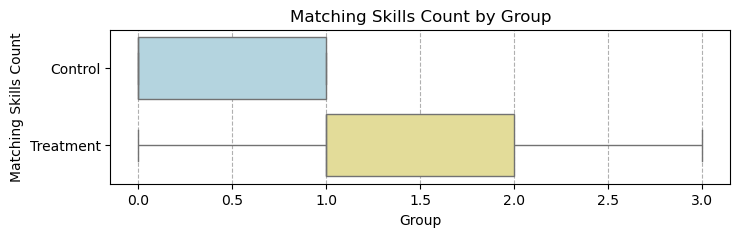

In [51]:
# Melt the DataFrame to long format
df_melted = pd.melt(df, var_name='Categories', value_name='Values')

# Create horizontal box plot
colors=['lightblue','khaki']
plt.figure(figsize=(8, 2))
sns.boxplot(x='matching_count', y='group', data=df_merged, orient='h',palette=colors)
plt.grid(axis='x', linestyle='--')
plt.title('Matching Skills Count by Group')
plt.xlabel('Group')
plt.ylabel('Matching Skills Count')
plt.savefig('./figures/skill-box-plot2.pdf', format='pdf')
plt.savefig('./figures/skill-box-plot2.png', format='png')

plt.show()

/var/folders/l8/z96b6x2n6kn4frf6tqv95ddr0000gn/T/ipykernel_22684/1992156538.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_merged, x='group', y='matching_count', palette=colors)


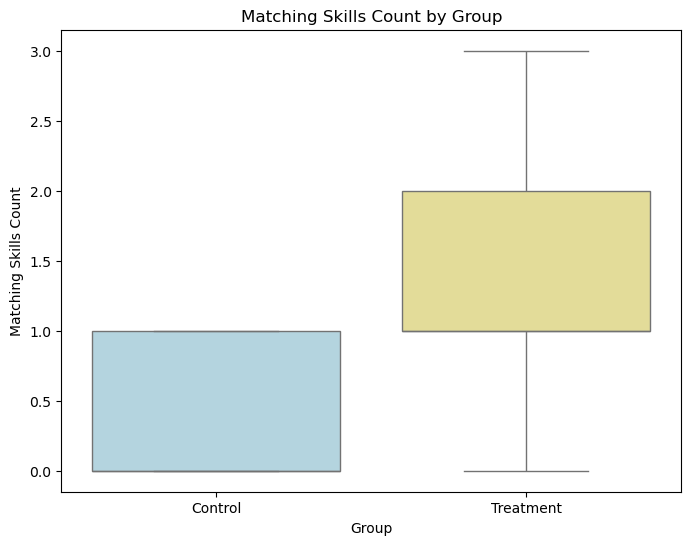

In [52]:
# Boxplot to visualize the matching_count distribution by group
plt.figure(figsize=(8, 6))
colors=['lightblue','khaki']
sns.boxplot(data=df_merged, x='group', y='matching_count', palette=colors)
plt.title('Matching Skills Count by Group')
plt.xlabel('Group')
plt.ylabel('Matching Skills Count')
plt.savefig('./figures/skill-box-plot.pdf', format='pdf')
plt.savefig('./figures/skill-box-plot.png', format='png')

plt.show()

In [59]:
control.describe()

count    13.000000
mean      0.461538
std       0.518875
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: matching_count, dtype: float64

In [62]:
control.median

<bound method Series.median of 0     0
2     0
4     1
6     0
9     1
10    1
13    1
14    0
17    1
18    0
20    1
22    0
23    0
Name: matching_count, dtype: int64>

In [61]:
treatment.describe()

count    13.000000
mean      1.153846
std       0.898717
min       0.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       3.000000
Name: matching_count, dtype: float64

In [63]:
treatment.median

<bound method Series.median of 1     0
3     0
5     2
7     1
8     1
11    2
12    1
15    1
16    2
19    1
21    1
24    0
25    3
Name: matching_count, dtype: int64>

In [53]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np

# Creating dataset
#np.random.seed(10)
#data_1 = np.random.normal(100, 10, 200)
#data_2 = np.random.normal(90, 20, 200)
#data_3 = np.random.normal(80, 30, 200)
#data_4 = np.random.normal(70, 40, 200)
#data = [data_1, data_2, data_3, data_4]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(df_merge[], patch_artist = True,
                notch ='True', vert = 0)

colors = ['#0000FF', '#00FF00', 
          '#FFFF00', '#FF00FF']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")

# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)

# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)

# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)
    
# x-axis labels
ax.set_yticklabels(['data_1', 'data_2', 
                    'data_3', 'data_4'])

# Adding title 
plt.title("Customized box plot")

# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
    
# show plot
plt.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (293938844.py, line 17)

0     0
1     0
2     0
3     0
4     1
5     2
6     0
7     1
8     1
9     1
10    1
11    2
12    1
13    1
14    0
15    1
16    2
17    1
18    0
19    1
20    1
21    1
22    0
23    0
24    0
25    3
Name: matching_count, dtype: int64
count    26.000000
mean      0.807692
std       0.800961
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       3.000000
Name: matching_count, dtype: float64


KeyError: 'Treatment'

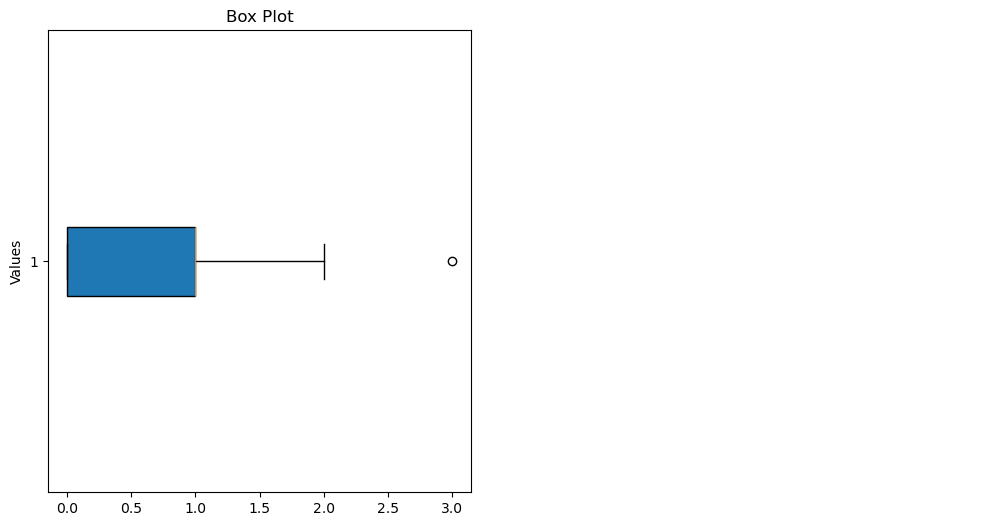

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample data - replace this with your own data
#np.random.seed(42)
#data = np.random.normal(0, 1, 100)
#df = pd.DataFrame(data, columns=['Value'])

desc = df_merged['matching_count']
print(desc)
# Calculate descriptive statistics from the data
desc_stats = desc.describe().T  # Transpose for a better layout in the table
print(desc_stats)
# Create a figure with two columns: one for the box plot and one for the table
fig, (ax_box, ax_table) = plt.subplots(ncols=2, figsize=(12, 6))

# Left half: Box plot
ax_box.boxplot(df_merged['matching_count'], vert=False, patch_artist=True)
ax_box.set_title('Box Plot')
ax_box.set_ylabel('Values')

# Right half: Table of descriptive statistics
# Remove axis for table visualization
ax_table.axis('tight')
ax_table.axis('off')
# Create the table in the axis
table = ax_table.table(cellText=desc_stats.values.round(2),
                       rowLabels=desc_stats[group],
                       colLabels=desc_stats.index,
                       loc='center')
ax_table.set_title('Descriptive Statistics')

plt.tight_layout()
plt.show()


In [ ]:
df_merged

,P,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Q18,group,Q45,Q48,REASONS TO SELECT THE ISSUE,Q52,Q50,REASONS TO CONFIDENCE,Q57_answer,Q56,Q7,Q12_1,Q12_2,Q12_3,Q12_4,Q12_5,Q8,Q46,REASONS TO SELECT THE ISSUE 2,Q59,Q51,Q60,Q61,Q20,Q1,Q2,REASONS FOR DIFFICULTY,Q3,Q4,REASONS TO FEELING ABLE TO SOLVE,Q5,Q19,Q22,Q58,Q23,Q10,Q11,Q11_4_TEXT,Q12,Q12_4_TEXT,Q13,Q14,Q15,correct,sound solution,issue_number,label1,label2,label3,label4,label5,label6,skill1,skill2,skill3,skill4,matching_count
0,P0,2022-10-06 15:01:10,2022-10-06 16:22:46,IP Address,134.114.101.49,100,4896,TRUE,2022-10-06 16:22:47,R_2Vjy0uinQde0zjf,NaN,NaN,NaN,NaN,351.872,-1.116.596,anonymous,EN,ids37@nau.edu,Control,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Throttle autosave actions #5679,the logic/autosaveandbackup/,AutosaveManager,AutosaveManager.java,AutosaveManager,line 43,I would include a bigger delay before the writ...,NaN,NaN,NaN,NaN,NaN,NaN,"User Interface (UI),Logging",Somewhat difficult,The issue dont give enough information to solv...,NaN,Yes,because I did what was requested in the issue ...,NaN,the issue should have more descriptions about ...,"API: User Interface,good first issue",Average,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,5679.0,API: Test,API: Input and Output,NaN,NaN,NaN,NaN,Input and Output,Test,NaN,NaN,0
1,P1,10/14/22 11:13,10/14/22 12:17,IP Address,76.174.176.43,100,3841,TRUE,10/14/22 12:17,R_3qDz5dSBkoy0g39,NaN,NaN,NaN,NaN,339.705,-1.184.308,anonymous,EN,felipefelixsantos@gmail.com,Treatment,5485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Opening a entry without a DOI causes an error ...,java/org/jabref/logic/importer/fetcher/,java/org/jabref/logic/importer/fetcher/CrossRe...,java/org/jabref/logic/importer/fetcher/CrossRe...,getURLForEntry,entry.getLatexFreeField(StandardField.TITLE).i...,Change query.title to query.bibliographic to c...,"Because of the ""good first issue label""",PERCEIVED EASE,NaN,NaN,NaN,NaN,NaN,Extremely easy,If the solution was correct it was a very smal...,ISSUE COMPLEXITY,Not sure,I was not able to test if my change solved the...,NaN,Pictures of how to reproduce could be good for...,good first issue,Confident,NaN,1 - Not being able to use shortcuts due to the...,Undergraduate degree,Professional Developer,NaN,Man,NaN,Brazil,Portugal,25 to 34,1.0,1.0,5485.0,good first issue,fetcher,API: Input and Output,NaN,NaN,NaN,Input and Output,NaN,NaN,NaN,0
2,P2,10/18/22 15:56,10/18/22 17:11,IP Address,134.114.101.51,100,4479,TRUE,10/18/22 17:11,R_31SLYqNzUZ8b41j,NaN,NaN,NaN,NaN,351.872,-1.116.596,anonymous,EN,gk325@nau.edu,Treatment,General fields layout: url and doi missing #4612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Default layout does not contain the fields url...,src/main/java/org/jabref/gui/preferences/preview,src/main/java/org/jabref/gui/preferences/previ...,NaN,NaN,NaN,The default layout for JabRef does not contain...,I just thought it would be something related t...,PERCEIVED EASE,NaN,NaN,NaN,NaN,NaN,Somewhat difficult,If I knew how the flow of the program works. I...,FAMILIARITY WITH CODEBASE and DEBUG PROCESS,No,I could not add the fields in the default layout.,NaN,You could give me a high-level idea of what cl...,search,Average,NaN,had fun. Thank you.,Master's degree,Student - Graduate,NaN,Man,NaN,India,United States of America,25 to 34,0.0,0.0,4612.0,entry editor,type: bug,peferences,API: User Interface,NaN,NaN,User Interface,NaN,NaN,NaN,0
3,P3,10/18/22 17:12,10/18/22 18:11,IP Address,134.114.101.51,100,3511,TRUE,10/18/22 18:11,R_3dRL71BWQjWRGrY,NaN,NaN,NaN,NaN,351.872,-1.116.596,anonymous,EN,sb3292@nau.edu,Treatment,Latex citations search - Missing citations #5194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The Latex citations search feature with the te...,java/org/jabref/model/texparser,LatexParserResult.java,LatexParserResult,public Collection<Citation> getCitationsByKey(...,ret

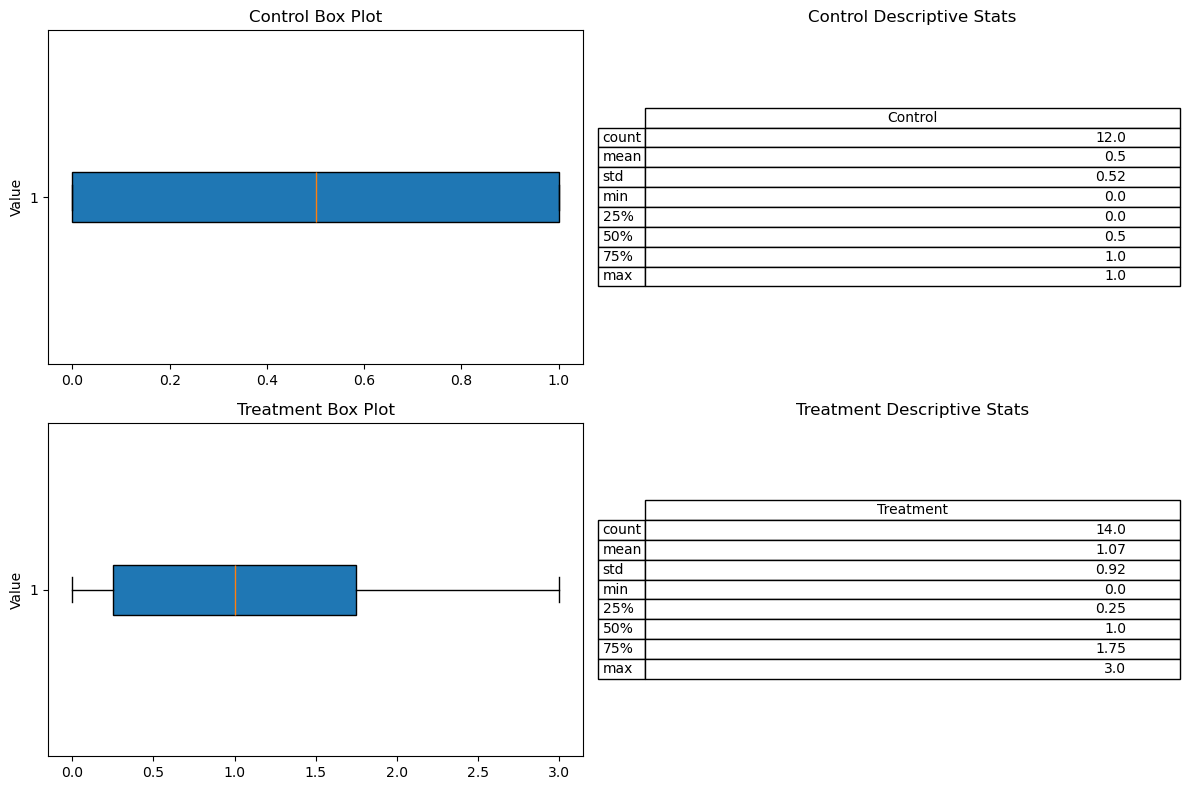

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------
# Sample data creation
# ---------------------------
#np.random.seed(42)
#n = 50
groups = ['Control', 'Treatment']
#data_list = []
##for group in groups:
#    # Create sample data for each group with different means
#    data = np.random.normal(loc=np.random.rand()*10, scale=2, size=n)
#    group_data = pd.DataFrame({'Group': group, 'Value': data})
#    data_list.append(group_data)
#df = pd.concat(data_list)

# ---------------------------
# Compute descriptive statistics per group
# ---------------------------
# This gives statistics with group as index and statistics as columns.
stats_df = df_merged.groupby('group')['matching_count'].describe().round(2)
# For a vertical table display, we transpose so that rows are stats and columns are groups.
stats_table = stats_df.transpose()

# ---------------------------
# Create figure: each group gets its own row with two panels (box plot and table)
# ---------------------------
num_groups = 2 #len(groups)
fig, axes = plt.subplots(nrows=num_groups, ncols=2, figsize=(12, 4*num_groups))

# Ensure axes is 2D even if there is only one group
if num_groups == 1:
    axes = np.array([axes])

for i, group in enumerate(groups):
    # Filter the data for the current group
    group_data = df_merged[df_merged['group'] == group]['matching_count']
    
    # Left panel: Box plot for the group
    axes[i, 0].boxplot(group_data, patch_artist=True, vert=False)
    axes[i, 0].set_title(f'{group} Box Plot')
    axes[i, 0].set_ylabel('Value')
    
    # Right panel: Vertical table of descriptive stats for the group
    # Extract the column for the current group from the transposed table
    stat_data = stats_table[group].to_frame()
    
    # Turn off the axis for table clarity
    axes[i, 1].axis('tight')
    axes[i, 1].axis('off')
    
    # Create the table (each row is a statistic, single column for the group)
    table = axes[i, 1].table(cellText=stat_data.values,
                             rowLabels=stat_data.index,
                             colLabels=[group],
                             loc='center')
    axes[i, 1].set_title(f'{group} Descriptive Stats')

plt.tight_layout()
plt.show()


group: Control


KeyError: 'group'

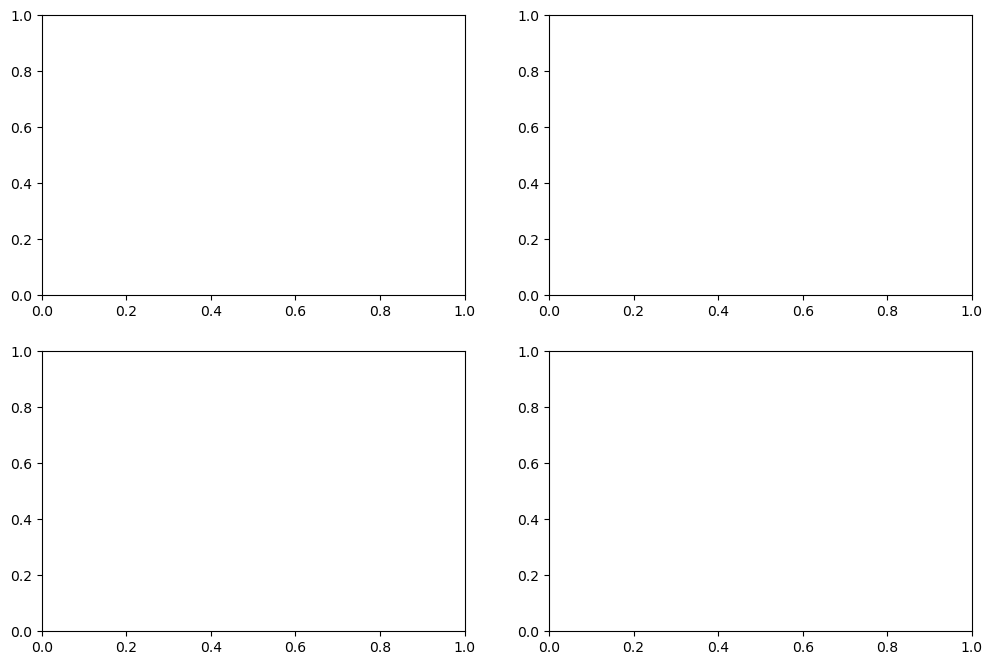

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('./data/Milestones - issues labels_final.csv')

# ---------------------------
# Define the column names to use
# ---------------------------
# Update these if your CSV file has different column names.
group_column = 'group'  # Column that defines groups
value_column = 'matching_count'     # Numeric column to plot

# Check available groups in the dataset
groups = df_merged[group_column].unique()
num_groups = len(groups)

# ---------------------------
# Create a figure: one row per group, with two panels each
# ---------------------------
fig, axes = plt.subplots(nrows=num_groups, ncols=2, figsize=(12, 4*num_groups))

# If there is only one group, make sure axes is 2D
if num_groups == 1:
    axes = np.array([axes])

# Loop over each group and plot
for i, group in enumerate(groups):
    # Filter data for the current group
    print ('group:', group)
    group_data = df[df[group_column] == group][value_column]
    
    # Left panel: Box plot for the group
    axes[i, 0].boxplot(group_data, patch_artist=True)
    axes[i, 0].set_title(f'{group} Box Plot')
    axes[i, 0].set_ylabel(value_column)
    
    # Compute descriptive statistics for the group
    stats = group_data.describe().round(2)
    stats_df = stats.to_frame()  # Convert to DataFrame for table display
    
    # Right panel: Vertical table with the descriptive statistics
    axes[i, 1].axis('tight')
    axes[i, 1].axis('off')
    table = axes[i, 1].table(cellText=stats_df.values,
                             rowLabels=stats_df.index,
                             colLabels=[group],
                             loc='center')
    axes[i, 1].set_title(f'{group} Descriptive Stats')

plt.tight_layout()
plt.show()


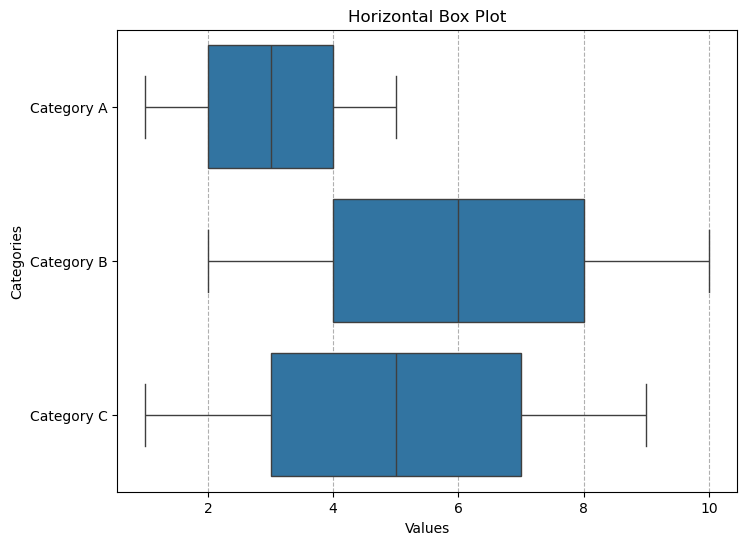

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = {'Category A': [1, 2, 3, 4, 5], 
        'Category B': [2, 4, 6, 8, 10],
        'Category C': [1, 3, 5, 7, 9]}
df = pd.DataFrame(data)

# Melt the DataFrame to long format
df_melted = pd.melt(df, var_name='Categories', value_name='Values')

# Create horizontal box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Values', y='Categories', data=df_melted, orient='h')
plt.title('Horizontal Box Plot')
plt.grid(axis='x', linestyle='--')
plt.show()